In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import toml
from plotnine import (
    aes,
    element_text,
    facet_grid,
    geom_bar,
    geom_point,
    ggplot,
    ggsave,
    theme,
    theme_bw,
    xlim,
    ylim,
)

In [2]:
# set paths and load data
path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_SHSY5Y_clean.parquet")
toml_path = pathlib.Path("../../../1.Exploratory_Data_Analysis/utils/params.toml")

df = pd.read_parquet(path)
params = toml.load(toml_path)
list_of_treatments = params["list_of_treatments"]["treatments"]

In [3]:
print(df.columns.to_list())

['plate_name', 'plate_barcode', 'position_x', 'cell_type', 'incubation inducer', 'inhibitor', 'inhibitor_concentration_value', 'inhibitor_concentration_unit', 'inhibitor_concentration', 'inducer1', 'inducer1_concentration_value', 'inducer1_concentration_unit', 'inducer1_concentration', 'inducer2', 'inducer2_concentration_value', 'inducer2_concentration_unit', 'inducer2_concentration', 'plate_position', 'user_plate_id', 'user_sample_id', 'position_y', 'nelisa_sample_dilution_fold', 'nelisa_sample_comments', 'nelisa_sample_pass_qc', 'nelisa_sample_id', 'Activin A [NSU]', 'AITRL (GITR Ligand) [NSU]', 'Amphiregulin [NSU]', 'Amyloid beta [NSU]', 'APRIL [NSU]', 'BAFF [NSU]', 'BCMA (TNFRSF17) [NSU]', 'BDNF [NSU]', 'BMP2 [NSU]', 'BMP3 [NSU]', 'BMP4 [NSU]', 'BMP6 [NSU]', 'BMP7 [NSU]', 'BMP9 [NSU]', 'C5_C5a [NSU]', 'Calbindin [NSU]', 'CCL1 [NSU]', 'CCL11 [NSU]', 'CCL13 [NSU]', 'CCL15 [NSU]', 'CCL16 [NSU]', 'CCL17 [NSU]', 'CCL18 [NSU]', 'CCL19 [NSU]', 'CCL2 [NSU]', 'CCL20 [NSU]', 'CCL21 [NSU]', '

In [4]:
# output path for the treatment df
output_path = pathlib.Path(
    f"./results/SHSY5Y_all_cytokine_values_per_treatment_per_well.csv"
)
df.to_csv(output_path, index=False)

In [5]:
df

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,...,VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Treatment,Dose,oneb_Treatment_Dose_Inhibitor_Dose,twob_Treatment_Dose_Inhibitor_Dose,threeb_Treatment_Dose_Inhibitor_Dose,fourb_Treatment_Dose_Inhibitor_Dose
0,70117_20230210MM1_P1,430420,C13,SH-SY5Y,6_h,DMSO,1.000,%,1.000,DMSO,...,0.570920,0.344809,0.232809,0.725177,DMSO,0.100_%,DMSO_0.100_%_DMSO_1.000_%,DMSO_DMSO_0.100_%,DMSO__0.100_%__DMSO_1.000,DMSO__0.100_%__DMSO__1.000
1,70117_20230210MM1_P1,430420,D13,SH-SY5Y,6_h,Z-VAD-FMK,100.000,µM,100.000,DMSO,...,0.457524,0.225962,0.300728,0.459638,DMSO,0.100_%,DMSO_0.100_%_Z-VAD-FMK_100.000_uM,DMSO_Z-VAD-FMK_0.100_%,DMSO__0.100_%__Z-VAD-FMK_100.000,DMSO__0.100_%__Z-VAD-FMK__100.000
2,70117_20230210MM1_P1,430420,E13,SH-SY5Y,6_h,Z-VAD-FMK,30.000,µM,30.000,DMSO,...,0.685494,0.207687,0.754146,0.679904,DMSO,0.100_%,DMSO_0.100_%_Z-VAD-FMK_30.000_uM,DMSO_Z-VAD-FMK_0.100_%,DMSO__0.100_%__Z-VAD-FMK_30.000,DMSO__0.100_%__Z-VAD-FMK__30.000
3,70117_20230210MM1_P1,430420,F13,SH-SY5Y,6_h,Z-VAD-FMK,100.000,µM,100.000,DMSO,...,0.537461,0.483328,0.533404,0.187470,DMSO,0.100_%,DMSO_0.100_%_Z-VAD-FMK_100.000_uM,DMSO_Z-VAD-FMK_0.100_%,DMSO__0.100_%__Z-VAD-FMK_100.000,DMSO__0.100_%__Z-VAD-FMK__100.000
4,70117_20230210MM1_P1,430420,G13,SH-SY5Y,6_h,Z-VAD-FMK,30.000,µM,30.000,DMSO,...,0.338754,0.748028,0.447766,0.733610,DMSO,0.100_%,DMSO_0.100_%_Z-VAD-FMK_30.000_uM,DMSO_Z-VAD-FMK_0.100_%,DMSO__0.100_%__Z-VAD-FMK_30.000,DMSO__0.100_%__Z-VAD-FMK__30.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,70117_20230210MM1_P1,430420,M15,SH-SY5Y,6_h,DMSO,0.025,%,0.030,Topotecan,...,0.000000,0.754374,0.676954,0.570847,Topotecan,5.000_nM,Topotecan_5.000_nM_DMSO_0.025_%,Topotecan_DMSO_5.000_nM,Topotecan__5.000_nM__DMSO_0.030,Topotecan__5.000_nM__DMSO__0.030
150,70117_20230210MM1_P1,430420,B13,SH-SY5Y,6_h,Media_ctr,NaN,nan,0.0,media_ctr,...,0.385698,0.176153,0.727225,0.529847,media_ctr,0.0_nan,media_ctr_0.0_0_Media_ctr_0.0_0,media_ctr_Media_ctr_0.0_nan,media_ctr__0.0_nan__Media_ctr_0.0,media_ctr__0.0_nan__Media_ctr__0.0
151,70117_20230210MM1_P1,430420,I13,SH-SY5Y,6_h,Media_ctr,NaN,nan,0.0,media_ctr,...,0.518688,0.428738,0.442567,0.486011,media_ctr,0.0_nan,media_ctr_0.0_0_Media_ctr_0.0_0,media_ctr_Media_ctr_0.0_nan,media_ctr__0.0_nan__Media_ctr_0.0,media_ctr__0.0_nan__Media_ctr__0.0
152,70117_20230210MM1_P1,430420,O22,SH-SY5Y,6_h,Media_ctr,NaN,nan,0.0,media_ctr,...,0.509006,0.663276,0.597001,0.403857,media_ctr,0.0_nan,media_ctr_0.0_0_Media_ctr_0.0_0,media_ctr_Media_ctr_0.0_nan,media_ctr__0.0_nan__Media_ctr_0.0,media_ctr__0.0_nan__Media_ctr__0.0


/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6 x 4 in image.
/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: ./figures/TNF_alpha_IL-1_beta_scatter_plot.png


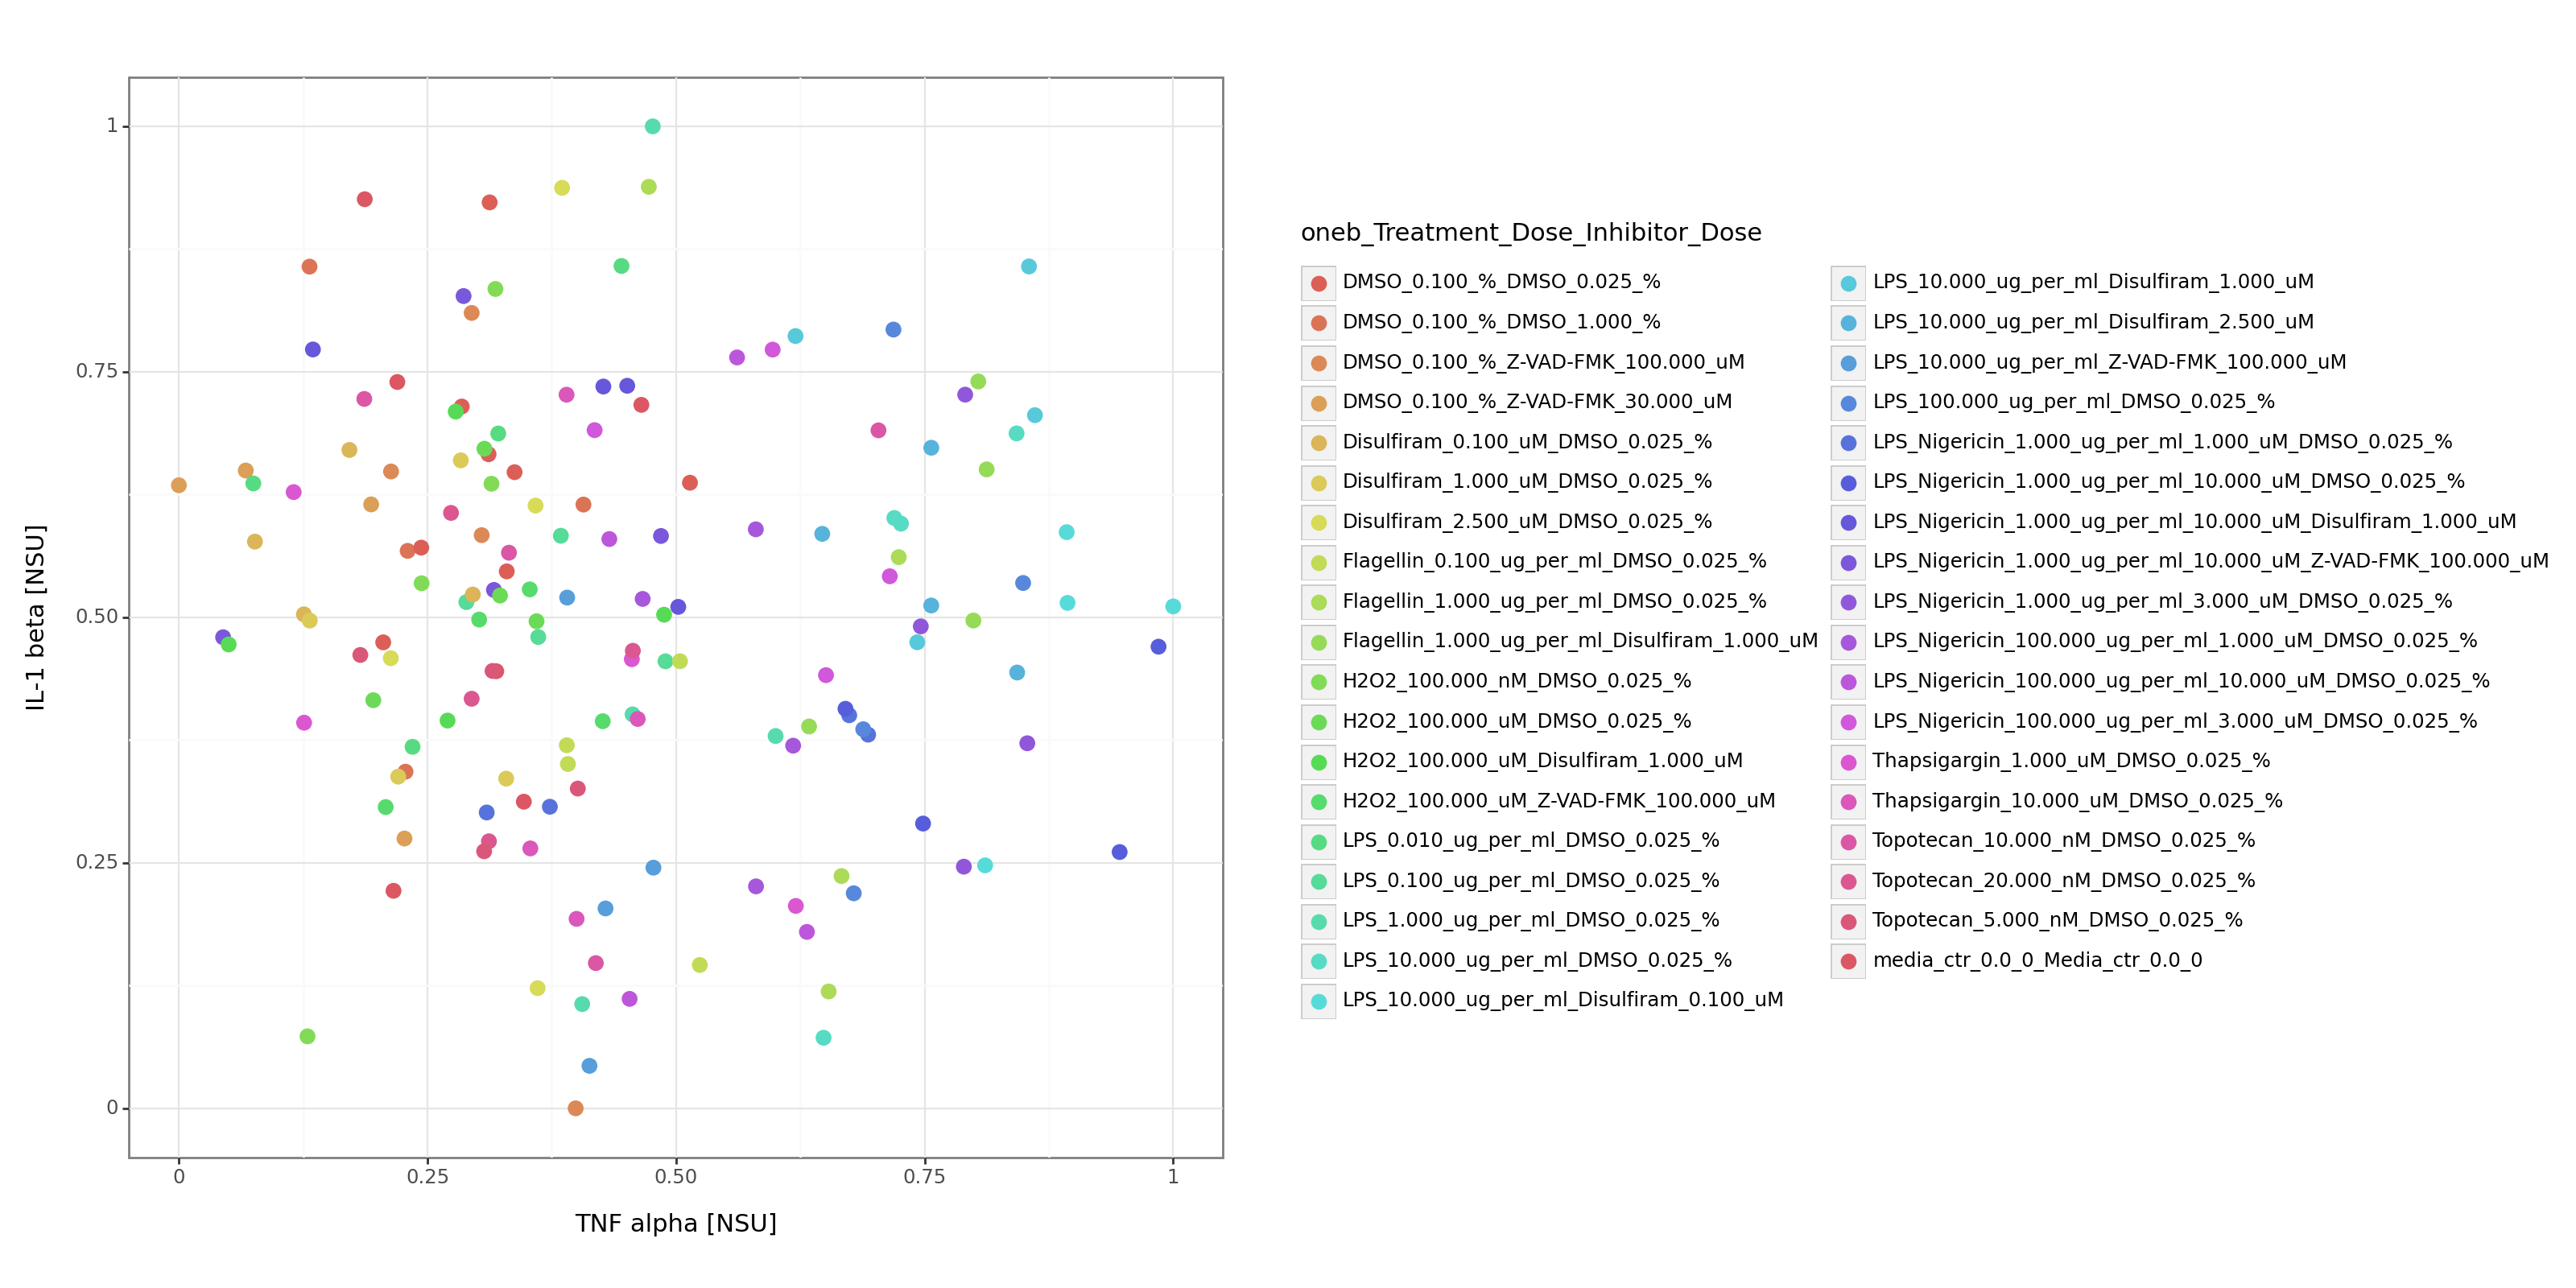

<Figure Size: (1600 x 800)>

In [6]:
# plot scatter plot of all the treatment groups for IL-1 beta

p = (
    ggplot(
        df,
        aes(
            x="TNF alpha [NSU]",
            y="IL-1 beta [NSU]",
            color="oneb_Treatment_Dose_Inhibitor_Dose",
        ),
    )
    + geom_point(size=3)
    + theme_bw()
    + ylim(0, 1)
    + xlim(0, 1)
)

ggplot.save(
    p,
    filename="./figures/TNF_alpha_IL-1_beta_scatter_plot.png",
    width=6,
    height=4,
    units="in",
    dpi=300,
)
p = p + theme(figure_size=(16, 8))
p

In [7]:
df_treatment = df.drop(columns=["position_x", "fourb_Treatment_Dose_Inhibitor_Dose"])
df_treatment = df_treatment.melt(
    id_vars=["oneb_Treatment_Dose_Inhibitor_Dose"],
    value_vars=df_treatment.columns.to_list()[1:],
    var_name="Cytokine",
    value_name="Cytokine_Value",
)

In [8]:
# outpath for the melted df
output_path = pathlib.Path(
    f"./results/SHSY5Y_all_cytokine_values_per_treatment_per_well_melted.csv"
)
df_treatment.to_csv(output_path, index=False)

In [9]:
df_treatment

,oneb_Treatment_Dose_Inhibitor_Dose,Cytokine,Cytokine_Value
0,DMSO_0.100_%_DMSO_1.000_%,plate_barcode,430420
1,DMSO_0.100_%_Z-VAD-FMK_100.000_uM,plate_barcode,430420
2,DMSO_0.100_%_Z-VAD-FMK_30.000_uM,plate_barcode,430420
3,DMSO_0.100_%_Z-VAD-FMK_100.000_uM,plate_barcode,430420
4,DMSO_0.100_%_Z-VAD-FMK_30.000_uM,plate_barcode,430420
...,...,...,...
32951,Topotecan_5.000_nM_DMSO_0.025_%,threeb_Treatment_Dose_Inhibitor_Dose,Topotecan__5.000_nM__DMSO_0.030
32952,media_ctr_0.0_0_Media_ctr_0.0_0,threeb_Treatment_Dose_Inhibitor_Dose,media_ctr__0.0_nan__Media_ctr_0.0
32953,media_ctr_0.0_0_Media_ctr_0.0_0,threeb_Treatment_Dose_Inhibitor_Dose,media_ctr__0.0_nan__Media_ctr_0.0
32954,media_ctr_0.0_0_Media_ctr_0.0_0,threeb_Treatment_Dose_Inhibitor_Dose,media_ctr__0.0_nan__Media_ctr_0.0
